In [1]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
# 한글 폰트 사용을 위해서 세팅

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
# 대출 데이터
row_data_frame = pd.read_csv("./new_model_data.csv", encoding = 'cp949',low_memory=False) 
row_data_frame.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Unnamed: 18
0,15,2,7,19,46,61,72,80,116,139,158,146,129,113,125,111,80,46,NaN
1,15,2,82,75,224,340,372,531,528,537,656,553,343,255,245,152,122,47,NaN
2,13,1,11,52,194,325,306,488,558,469,599,492,325,291,249,121,85,34,NaN
3,15,4,10,29,60,94,109,146,178,156,175,164,127,110,108,119,78,32,NaN
4,15,1,0,0,7,21,33,44,58,86,88,72,69,62,61,47,43,17,NaN


In [3]:
row_data_frame.columns

Index(['label', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', 'Unnamed: 18'],
      dtype='object')

In [33]:
row_data_frame.columns = ['label',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [34]:
row_data_frame.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,15,2,7,19,46,61,72,80,116,139,158,146,129,113,125,111,80,46
1,15,2,82,75,224,340,372,531,528,537,656,553,343,255,245,152,122,47
2,13,1,11,52,194,325,306,488,558,469,599,492,325,291,249,121,85,34
3,15,4,10,29,60,94,109,146,178,156,175,164,127,110,108,119,78,32
4,15,1,0,0,7,21,33,44,58,86,88,72,69,62,61,47,43,17


In [10]:
row_data_frame.index

RangeIndex(start=0, stop=1782, step=1)

In [52]:
row_data_frame['index' == 0]

0       2
1       2
2       1
3       4
4       1
       ..
1777    2
1778    2
1779    2
1780    2
1781    2
Name: 0, Length: 1782, dtype: int64

# Normalization을 해주고 255 픽셀을 곱해 주자

In [160]:
data_set = []
for idx in row_data_frame.index:
    data_set.append([])
    for time in row_data_frame.columns[1:]: #아래 방향으로 뽑아냄    
        data_set[idx].append(row_data_frame[time][idx])

In [161]:
row_data_frame.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,15,2,7,19,46,61,72,80,116,139,158,146,129,113,125,111,80,46
1,15,2,82,75,224,340,372,531,528,537,656,553,343,255,245,152,122,47
2,13,1,11,52,194,325,306,488,558,469,599,492,325,291,249,121,85,34
3,15,4,10,29,60,94,109,146,178,156,175,164,127,110,108,119,78,32
4,15,1,0,0,7,21,33,44,58,86,88,72,69,62,61,47,43,17


In [166]:
len(data_set)

1782

In [168]:
for i in range (0,len(data_set)):
    if len(data_set[i]) != 17:
        print("E")

In [197]:
def min_max_normalization(x,lst,i): #검정색일 수록 높은 숫자이도록
    return 255 - int(( (x-min(lst[i]))/(max(lst[i]) - min(lst[i])) )*255)

In [198]:
for lst_num in range (0,len(data_set)):
    print(lst_num)
    data_set[lst_num] = list(map(lambda x: min_max_normalization(x,data_set,lst_num), data_set[lst_num])) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-197-cd327507e99c>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  return 255 - int(( (x-min(lst[i]))/(max(lst[i]) - min(lst[i])) )*255)


ValueError: cannot convert float NaN to integer

In [199]:
data_set[776]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 예외처리를 해주자

In [202]:
for lst_num in range (0,len(data_set)):
    if (max(data_set[lst_num]) == min(data_set[lst_num])): #예외처리
        continue
    data_set[lst_num] = list(map(lambda x: min_max_normalization(x,data_set,lst_num), data_set[lst_num])) 

In [203]:
data_set[:3]

[[255, 247, 228, 184, 159, 141, 128, 69, 32, 0, 20, 48, 74, 54, 77, 128, 184],
 [255,
  224,
  227,
  169,
  124,
  111,
  49,
  50,
  47,
  0,
  41,
  123,
  157,
  161,
  197,
  209,
  238],
 [255,
  251,
  234,
  173,
  117,
  125,
  48,
  18,
  56,
  0,
  46,
  117,
  132,
  150,
  204,
  220,
  241]]

In [204]:
img_data_frame = pd.DataFrame(data_set)

In [205]:
row_data_frame

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,15,2,7,19,46,61,72,80,116,139,158,146,129,113,125,111,80,46
1,15,2,82,75,224,340,372,531,528,537,656,553,343,255,245,152,122,47
2,13,1,11,52,194,325,306,488,558,469,599,492,325,291,249,121,85,34
3,15,4,10,29,60,94,109,146,178,156,175,164,127,110,108,119,78,32
4,15,1,0,0,7,21,33,44,58,86,88,72,69,62,61,47,43,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,15,2,8,24,44,69,65,100,122,145,130,96,73,69,54,0,0,0
1778,15,2,10,23,60,75,74,106,138,141,160,120,91,77,66,0,0,0
1779,15,2,12,20,39,66,60,71,103,103,105,65,14,0,0,0,0,0
1780,15,2,9,16,43,58,66,72,109,116,119,105,76,69,58,16,11,11


In [206]:
img_data_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,255,247,228,184,159,141,128,69,32,0,20,48,74,54,77,128,184
1,255,224,227,169,124,111,49,50,47,0,41,123,157,161,197,209,238
2,255,251,234,173,117,125,48,18,56,0,46,117,132,150,204,220,241
3,255,247,219,173,124,102,47,0,33,5,21,75,100,103,87,147,214
4,253,255,255,235,195,160,128,87,6,0,47,56,76,79,119,131,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,3,14,42,77,121,114,175,214,255,228,168,128,121,94,0,0,0
1778,3,15,36,95,119,117,168,219,224,255,191,145,122,105,0,0,0
1779,4,29,48,94,160,145,172,250,250,255,157,34,0,0,0,0,0
1780,0,15,30,89,122,139,152,233,248,255,224,161,146,122,30,19,19


In [207]:
img_data_frame=img_data_frame.transpose()
img_data_frame

,0,1,2,3,4,5,6,7,8,9,...,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781
0,255,255,255,255,253,255,255,255,255,255,...,3,0,3,0,0,3,3,4,0,0
1,247,224,251,247,255,253,250,251,252,253,...,16,9,27,0,14,14,15,29,15,23
2,228,227,234,219,255,238,236,239,237,236,...,36,27,41,12,35,42,36,48,30,40
3,184,169,173,173,235,198,204,214,208,195,...,99,75,62,37,78,77,95,94,89,73
4,159,124,117,124,195,165,123,146,127,139,...,122,111,97,57,126,121,119,160,122,93
5,141,111,125,102,160,156,118,141,118,139,...,109,98,80,74,112,114,117,145,139,97
6,128,49,48,47,128,88,28,49,44,45,...,167,145,153,143,145,175,168,172,152,120
7,69,50,18,0,87,67,44,37,23,18,...,211,201,213,172,209,214,219,250,233,164
8,32,47,56,33,6,78,51,66,19,30,...,246,219,227,209,226,255,224,250,248,234
9,0,0,0,5,0,0,0,0,0,0,...,255,255,255,246,255,228,255,255,255,255


In [209]:
sample_img = np.array(img_data_frame[0])
sample_img

array([255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
        54,  77, 128, 184], dtype=int64)

In [218]:
len(img_data_frame.columns)

1782

In [212]:
my_img = []
for i in range (0,10):
    my_img.append(sample_img)
my_img = np.array(my_img)

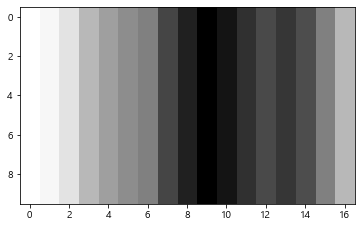

In [213]:
plt.imshow(my_img,cmap="gray") #그레이 스케일

* 주의점 : 여기서 x 축에 6을 더해야 시간이 나온다

In [224]:
img_set = []
for i in range (0, len(img_data_frame.columns)):    
    tmp_img = []
    for _ in range (0,10):
        tmp_img.append(img_data_frame[i])
    img_set.append(np.array(tmp_img))

In [226]:
img_set[:3]

[array([[255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20,  48,  74,
          54,  77, 128, 184],
        [255, 247, 228, 184, 159, 141, 128,  69,  32,   0,  20, 

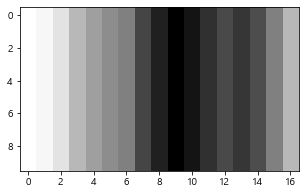

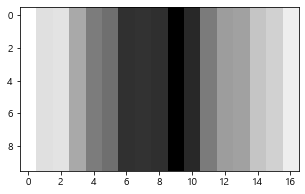

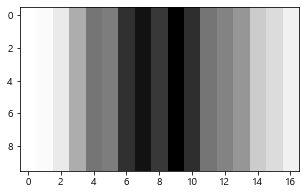

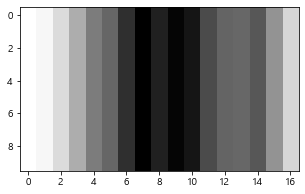

In [233]:
for n in range (0, 4):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_set[n],cmap="gray") #그레이 스케일

이미지 데이터 준비 완료

# label 만 따오자

In [234]:
row_data_frame['label']

0       15
1       15
2       13
3       15
4       15
        ..
1777    15
1778    15
1779    15
1780    15
1781    16
Name: label, Length: 1782, dtype: int64

In [237]:
label_set = list(row_data_frame['label'])
print(label_set)

[15, 15, 13, 15, 15, 15, 15, 15, 15, 15, 16, 15, 16, 15, 15, 13, 16, 15, 16, 16, 15, 15, 15, 16, 16, 16, 16, 15, 15, 15, 16, 16, 16, 16, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 15, 16, 19, 16, 19, 16, 16, 15, 16, 15, 16, 15, 15, 15, 13, 16, 15, 13, 15, 15, 16, 13, 16, 15, 16, 15, 15, 15, 13, 15, 12, 16, 12, 15, 15, 16, 16, 13, 16, 12, 15, 13, 16, 16, 13, 16, 16, 15, 15, 16, 16, 16, 16, 16, 16, 16, 15, 16, 19, 16, 15, 15, 15, 15, 16, 15, 15, 13, 15, 15, 14, 15, 15, 15, 15, 15, 13, 16, 16, 14, 15, 15, 15, 14, 15, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 16, 14, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 15, 14, 15, 14, 15, 15, 16, 14, 15, 14, 14, 15, 13, 15, 15, 13, 15, 15, 13, 15, 16, 12, 16, 15, 15, 13, 16, 16, 12, 16, 15, 15, 15, 16, 16, 12, 16, 15, 15, 15, 15, 16, 15, 15, 16, 15, 15, 16, 16, 15, 16, 16, 16, 15, 15, 16, 18, 19, 16, 16, 16, 15, 16, 16, 16, 19, 16, 15, 15, 16, 19, 16, 12, 16, 15, 16, 15, 15,

In [238]:
len(label_set)

1782

In [239]:
len(img_set)

1782

In [240]:
img_data_frame

,0,1,2,3,4,5,6,7,8,9,...,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781
0,255,255,255,255,253,255,255,255,255,255,...,3,0,3,0,0,3,3,4,0,0
1,247,224,251,247,255,253,250,251,252,253,...,16,9,27,0,14,14,15,29,15,23
2,228,227,234,219,255,238,236,239,237,236,...,36,27,41,12,35,42,36,48,30,40
3,184,169,173,173,235,198,204,214,208,195,...,99,75,62,37,78,77,95,94,89,73
4,159,124,117,124,195,165,123,146,127,139,...,122,111,97,57,126,121,119,160,122,93
5,141,111,125,102,160,156,118,141,118,139,...,109,98,80,74,112,114,117,145,139,97
6,128,49,48,47,128,88,28,49,44,45,...,167,145,153,143,145,175,168,172,152,120
7,69,50,18,0,87,67,44,37,23,18,...,211,201,213,172,209,214,219,250,233,164
8,32,47,56,33,6,78,51,66,19,30,...,246,219,227,209,226,255,224,250,248,234
9,0,0,0,5,0,0,0,0,0,0,...,255,255,255,246,255,228,255,255,255,255


# CSV 파일에 저장하기

In [241]:
img_data_frame.to_csv("img_data.csv")

In [242]:
rev_img_data_frame=img_data_frame.transpose()
rev_img_data_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,255,247,228,184,159,141,128,69,32,0,20,48,74,54,77,128,184
1,255,224,227,169,124,111,49,50,47,0,41,123,157,161,197,209,238
2,255,251,234,173,117,125,48,18,56,0,46,117,132,150,204,220,241
3,255,247,219,173,124,102,47,0,33,5,21,75,100,103,87,147,214
4,253,255,255,235,195,160,128,87,6,0,47,56,76,79,119,131,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,3,14,42,77,121,114,175,214,255,228,168,128,121,94,0,0,0
1778,3,15,36,95,119,117,168,219,224,255,191,145,122,105,0,0,0
1779,4,29,48,94,160,145,172,250,250,255,157,34,0,0,0,0,0
1780,0,15,30,89,122,139,152,233,248,255,224,161,146,122,30,19,19


In [243]:
rev_img_data_frame.to_csv("rev_img_data.csv")